In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline



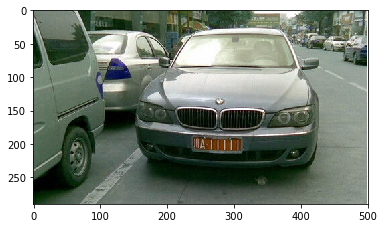

In [91]:
img = cv2.imread("test.jpg")
plt.imshow(img)
plt.show()

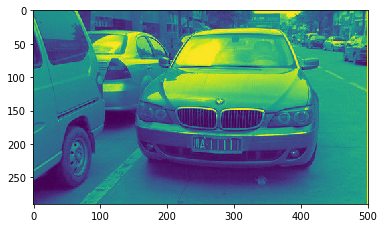

In [92]:
##灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

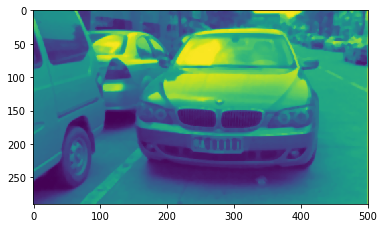

In [94]:
##高斯平滑和中值滤波
gaussian = cv2.GaussianBlur(gray, (3, 3), 0, 0, cv2.BORDER_DEFAULT)
median = cv2.medianBlur(gaussian, 5)
plt.imshow(median)
plt.show()

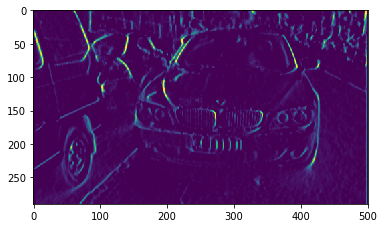

In [95]:
## Sobel边缘检测
sobel = cv2.Sobel(median, cv2.CV_8U, 1, 0,  ksize = 3)
plt.imshow(sobel)
plt.show()

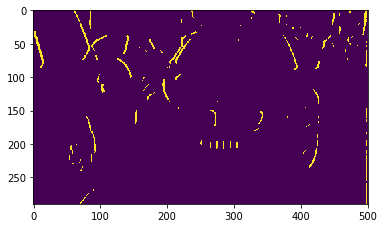

In [134]:
## 二值化
ret, binary = cv2.threshold(sobel, 100, 255, cv2.THRESH_BINARY)
plt.imshow(binary)
plt.show()

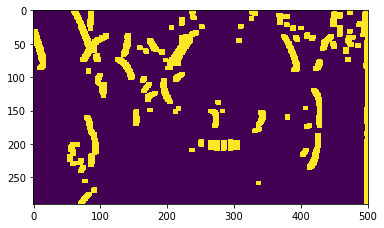

In [135]:
# 膨胀和腐蚀操作的核函数
element1 = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
element2 = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 6))
# 膨胀一次，让轮廓突出
dilation = cv2.dilate(binary, element2, iterations = 1)
# 腐蚀一次，去掉细节
erosion = cv2.erode(dilation, element1, iterations = 1)
# 再次膨胀，让轮廓明显一些
dilation2 = cv2.dilate(erosion, element2,iterations = 3)

plt.imshow(dilation)
plt.show()

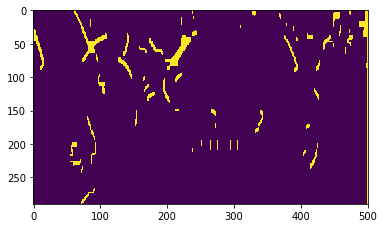

In [136]:
plt.imshow(erosion)
plt.show()

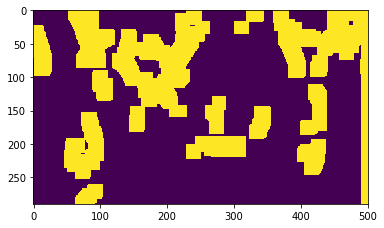

In [137]:
plt.imshow(dilation2)
plt.show()

In [139]:
def findPlateNumberRegion(img):
    region = []
    # 查找轮廓
    contours,hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # 筛选面积小的
    for i in range(len(contours)):
        cnt = contours[i]
        # 计算该轮廓的面积
        area = cv2.contourArea(cnt)

        # 面积小的都筛选掉
        if (area < 2000):
            continue

        # 轮廓近似，作用很小
        epsilon = 0.001 * cv2.arcLength(cnt,True)
        approx = cv2.approxPolyDP(cnt, epsilon, True)

        # 找到最小外接矩形，该矩形可能有方向
        rect = cv2.minAreaRect(cnt)

        # box是四个点的坐标
        box = cv2.boxPoints(rect)
        box = np.int0(box)

        # 计算高和宽
        height = abs(box[0][1] - box[2][1])
        width = abs(box[0][0] - box[2][0])

        # 车牌正常情况下长高比在2.7-5之间
        ratio =float(width) / float(height)
        if (ratio > 5 or ratio < 2):
            continue

        region.append(box)

    return region

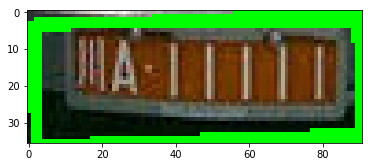

In [140]:
# 用绿线画出这些找到的轮廓
region=findPlateNumberRegion(dilation2)
for box in region:
    cv2.drawContours(img, [box], 0, (0, 255, 0), 2)
ys = [box[0, 1], box[1, 1], box[2, 1], box[3, 1]]
xs = [box[0, 0], box[1, 0], box[2, 0], box[3, 0]]
ys_sorted_index = np.argsort(ys)
xs_sorted_index = np.argsort(xs)

x1 = box[xs_sorted_index[0], 0]
x2 = box[xs_sorted_index[3], 0]

y1 = box[ys_sorted_index[0], 1]
y2 = box[ys_sorted_index[3], 1]

img_org2 = img.copy()
img_plate = img_org2[y1:y2, x1:x2]

plt.imshow(img_plate)
plt.show()